# Battery environment demo

## Demo 1

In [52]:
import numpy as np

from energy_py.envs.battery.battery_env import Battery_Env

In [53]:
#  create an env object from the Battery_Env class

EPISODE_LENGTH = 287
EPISODES = 2
env = Battery_Env(lag=0,
                  episode_length=EPISODE_LENGTH,
                  power_rating=2,
                  capacity=4,
                  initial_charge=0,
                  verbose=1)

Reset environment
observation time series shape is (288, 7)
observation time series columns are Index(['electricity_price_[$/MWh]', 'electricity_demand_[MW]', 'month', 'day',
       'hour', 'minute', 'weekday'],
      dtype='object')


In [54]:
#  reload the state infomation from a local csv - for reproducibility.
env.observation_ts, env.state_ts = env.load_state('state.csv', env.lag)                                                           

observation time series shape is (288, 7)
observation time series columns are Index(['electricity_price_[$/MWh]', 'electricity_demand_[MW]', 'month', 'day',
       'hour', 'minute', 'weekday'],
      dtype='object')


In [55]:
#   we now step through the environment by simulating actions


for episode in range(1, EPISODES):
    observation = env.reset()
    done = False
    while done is False:
        #  we now simulate a naive agent
        #  make decision based on one state variable - the hour
        hour = observation[4]

        if hour >= 6 and hour < 10:
            #  discharge at max rate
            action = env.action_space[0].low

        elif hour >= 15 and hour < 21:
            #  discharge at max rate
            action = env.action_space[0].low

        else:
            #  charge at max rate
            action = env.action_space[0].high
        action = [action]  #  action is passed as a list

        #  now action is set    
        #  take one step through the environment
        observation, reward, done, info = env.step(action, episode)

Reset environment
observation time series shape is (288, 7)
observation time series columns are Index(['electricity_price_[$/MWh]', 'electricity_demand_[MW]', 'month', 'day',
       'hour', 'minute', 'weekday'],
      dtype='object')
step is 0
action was 2
old charge was 0
new charge is 0.150000
rate is 1.8
losses were 0.0166667
step is 1
action was 2
old charge was 0.1499999999999999944488848768742172978818416595458984375
new charge is 0.300000
rate is 1.8
losses were 0.0166667
step is 2
action was 2
old charge was 0.299999999999999988897769753748434595763683319091796875
new charge is 0.450000
rate is 1.8
losses were 0.0166667
step is 3
action was 2
old charge was 0.450000000000000011102230246251565404236316680908203125
new charge is 0.600000
rate is 1.8
losses were 0.0166667
step is 4
action was 2
old charge was 0.59999999999999997779553950749686919152736663818359375
new charge is 0.750000
rate is 1.8
losses were 0.0166667
step is 5
action was 2
old charge was 0.75
new charge is 0.90

step is 97
action was -2
old charge was -1.18054000000000004728973754100958470013688794999083135166651595909992745906252658943925394632444299337582647054778333105303458659803291061658747640450428662006743252277374267578125E-55
new charge is -1.18054E-56
rate is 1.27499e-54
losses were 1.18054E-56
step is 98
action was -2
old charge was -1.18054000000000009256813293514314653768248440442979025507917194979561840697560103911676053928866856707348373035257382832279678308242205889600114077087056330128689296543598175048828125E-56
new charge is -1.18054E-57
rate is 1.27499e-55
losses were 1.18054E-57
step is 99
action was 2
old charge was -1.18053999999999995107314732847576579535249548430804368191462197887158419474724338387455243627546364926830479346260352435478991906870597052283343962597594867247607908211648464202880859375E-57
new charge is 0.150000
rate is 1.8
losses were 0.0166667
step is 100
action was 2
old charge was 0.1499999999999999944488848768742172978818416595458984375
new charge is 

In [56]:
#  now can create the outputs dictionary
env_outputs = env.output_results()

Episode 1 ran for 286 steps
RL cost was 10705.54535168335
BAU cost was 10544.433333333345
Savings were -161.1120183500043


In [57]:
#  the outputs dictionary holds some useful stuff
env_outputs.keys()

dict_keys(['dataframe', 'technical_fig', 'electricity_cost_fig'])

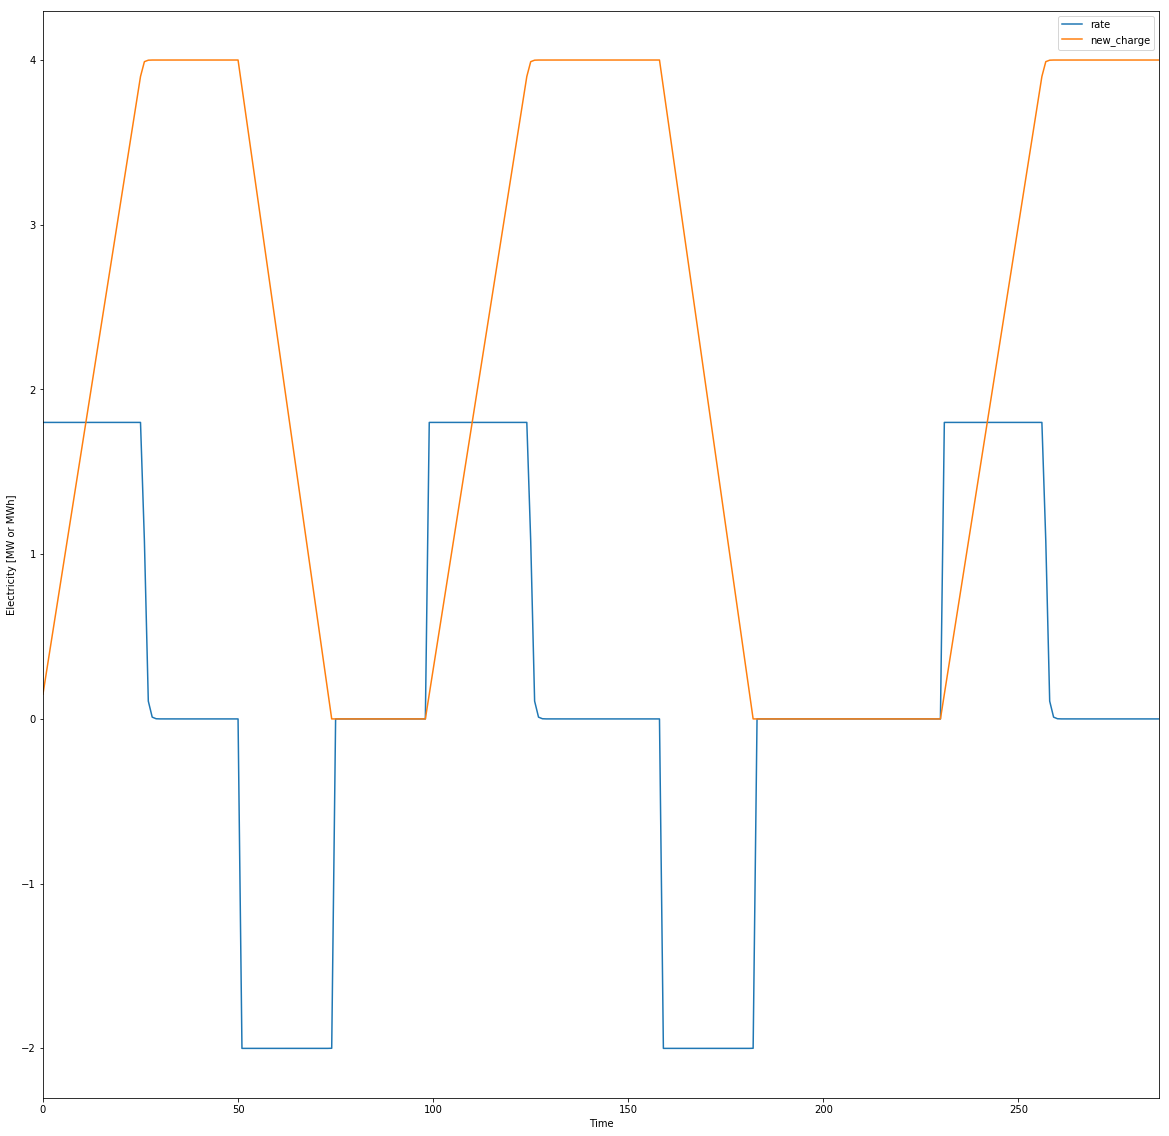

In [58]:
#  like figures
fig1 = env_outputs['technical_fig']
fig1

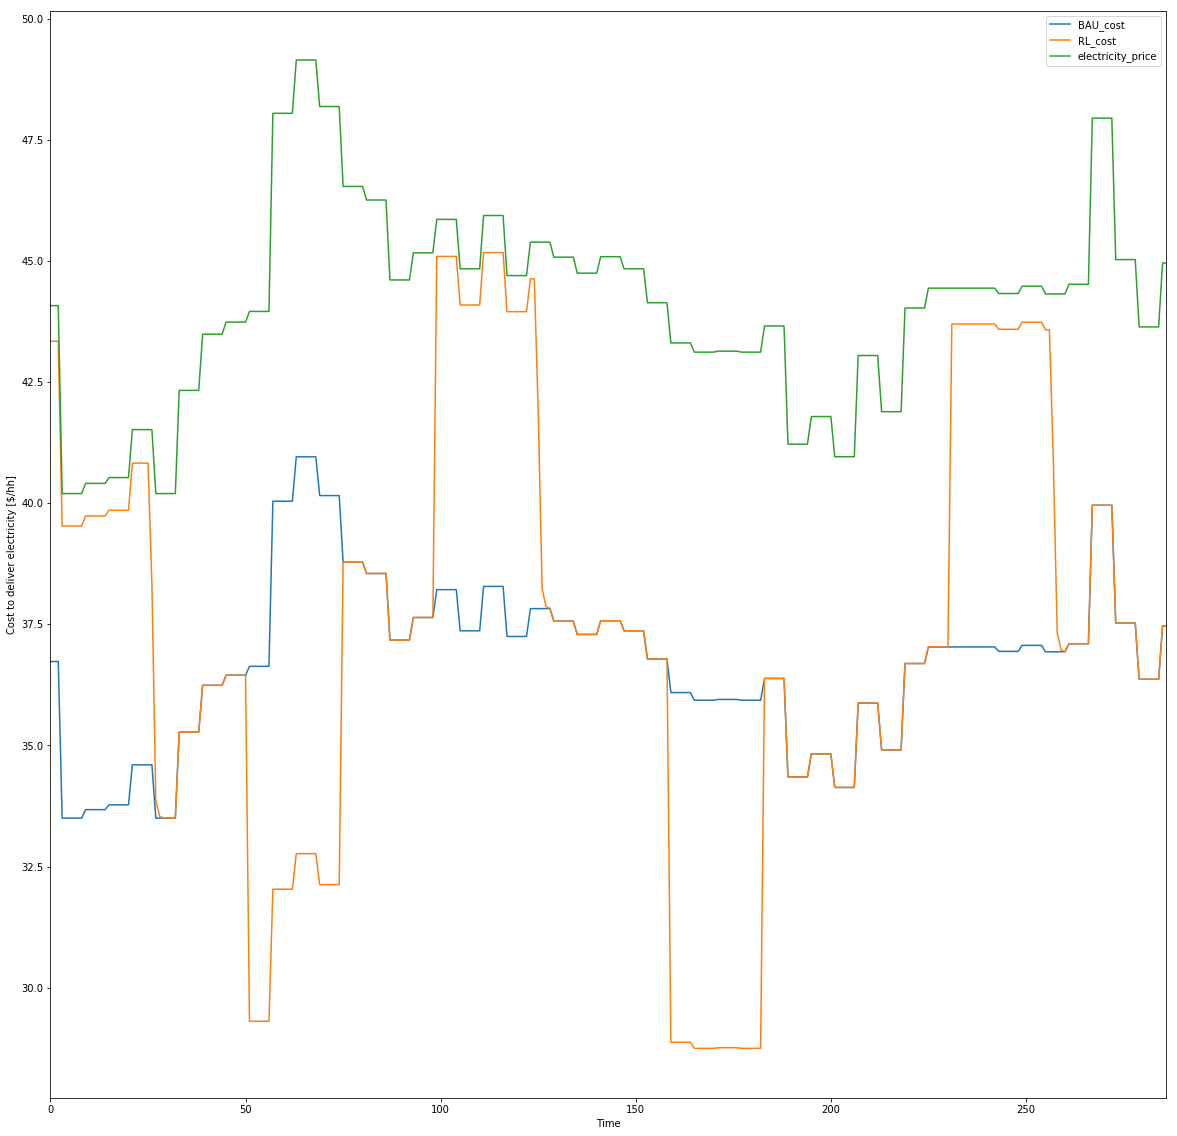

In [59]:
fig2 = env_outputs['electricity_cost_fig']
fig2

In [60]:
#  env_outputs also has a dataframe of the history of the last episode 
#  note - the last episode only (env is reset inbetween episodes)
df = env_outputs['dataframe']

In [61]:
df.head()

,BAU_cost,RL_cost,action,electricity_demand,electricity_price,episode,net_stored,new_charge,next_observation,next_state,observation,old_charge,rate,reward,state,steps
0,36.733333,43.345333,2,10.0,44.08,1,0.150000,0.150000,"[44.08, 10.0, 1.0, 2.0, 1.0, 50.0, 2.0, 0.15]","[44.08, 10.0, 1.0, 2.0, 1.0, 50.0, 2.0, 0.15]","[44.08, 10.0, 1.0, 2.0, 1.0, 40.0, 2.0, 0.0]",0,1.8,-43.345333,"[44.08, 10.0, 1.0, 2.0, 1.0, 40.0, 2.0, 0.0]",1
1,36.733333,43.345333,2,10.0,44.08,1,0.150000,0.300000,"[44.08, 10.0, 1.0, 2.0, 1.0, 55.0, 2.0, 0.3]","[44.08, 10.0, 1.0, 2.0, 1.0, 55.0, 2.0, 0.3]","[44.08, 10.0, 1.0, 2.0, 1.0, 50.0, 2.0, 0.15]",0.14999999999999999444888487687421729788184165...,1.8,-43.345333,"[44.08, 10.0, 1.0, 2.0, 1.0, 50.0, 2.0, 0.15]",2
2,36.733333,43.345333,2,10.0,44.08,1,0.150000,0.450000,"[40.2, 10.0, 1.0, 2.0, 2.0, 0.0, 2.0, 0.45]","[40.2, 10.0, 1.0, 2.0, 2.0, 0.0, 2.0, 0.45]","[44.08, 10.0, 1.0, 2.0, 1.0, 55.0, 2.0, 0.3]",0.29999999999999998889776975374843459576368331...,1.8,-43.345333,"[44.08, 10.0, 1.0, 2.0, 1.0, 55.0, 2.0, 0.3]",3
3,33.500000,39.530000,2,10.0,40.20,1,0.150000,0.600000,"[40.2, 10.0, 1.0, 2.0, 2.0, 5.0, 2.0, 0.6]","[40.2, 10.0, 1.0, 2.0, 2.0, 5.0, 2.0, 0.6]","[40.2, 10.0, 1.0, 2.0, 2.0, 0.0, 2.0, 0.45]",0.45000000000000001110223024625156540423631668...,1.8,-39.530000,"[40.2, 10.0, 1.0, 2.0, 2.0, 0.0, 2.0, 0.45]",4
4,33.500000,39.530000,2,10.0,40.20,1,0.150000,0.750000,"[40.2, 10.0, 1.0, 2.0, 2.0, 10.0, 2.0, 0.75]","[40.2, 10.0, 1.0, 2.0, 2.0, 10.0, 2.0, 0.75]","[40.2, 10.0, 1.0, 2.0, 2.0, 5.0, 2.0, 0.6]",0.59999999999999997779553950749686919152736663...,1.8,-39.530000,"[40.2, 10.0, 1.0, 2.0, 2.0, 5.0, 2.0, 0.6]",5


In [62]:
df.shape

(287, 16)